# Assignment 5

---

Zie opdracht delen hieronder:



- Download lifeExpectancyAtBirth.csv from Brightspace ([original source](https://www.kaggle.com/utkarshxy/who-worldhealth-statistics-2020-complete?select=lifeExpectancyAtBirth.csv)).
- Move the file to the same folder as the Notebook that you will be working in.
- Load the dataset in your Notebook with the following code: lifeExpectancy = pd.read_csv('lifeExpectancyAtBirth.csv', sep=',')
- Look at the dataset with the .head() function.

In [44]:
import pandas as pd

lifeExpectancy = pd.read_csv('lifeExpectancyAtBirth.csv', sep=',')
lifeExpectancy.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Life expectancy at birth (years),Both sexes,63.21
1,Afghanistan,2019,Life expectancy at birth (years),Male,63.29
2,Afghanistan,2019,Life expectancy at birth (years),Female,63.16
3,Afghanistan,2015,Life expectancy at birth (years),Both sexes,61.65
4,Afghanistan,2015,Life expectancy at birth (years),Male,61.04


---

- Filter the dataframe: We only want the life expectancy data about 2019 and 'Both sexes'
- Use this dataframe to perform a univariate analysis on the life expectancy in 2019.
- Which five countries have the highest life expectancy? Which five the lowest?

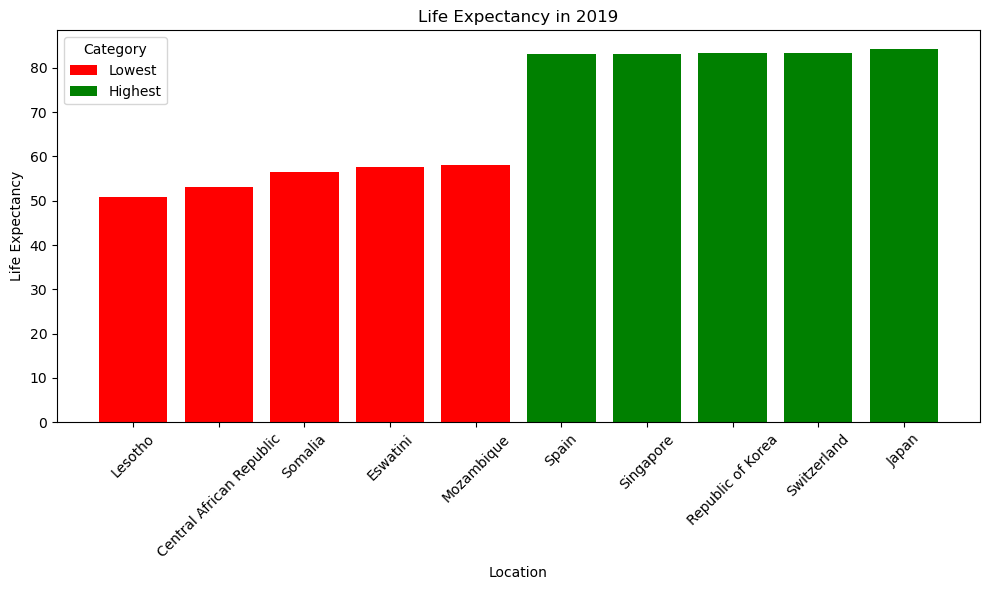

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter op jaar en beide sexes, laagste en hoogste
filtered_life_expectancy = lifeExpectancy[(lifeExpectancy['Period'] == 2019) & (lifeExpectancy['Dim1'] == 'Both sexes')]
lowest = filtered_life_expectancy.sort_values('First Tooltip').head(5)
highest = filtered_life_expectancy.sort_values('First Tooltip').tail(5)

# Stel category in
lowest['Category'] = 'Lowest'
highest['Category'] = 'Highest'
data = pd.concat([lowest, highest])
colors = {'Lowest': 'red', 'Highest': 'green'}
fig, ax = plt.subplots(figsize=(10, 6))

# Herhaal door de categorieën in de 'Category' kolom
for category in data['Category'].unique():
    category_data = data[data['Category'] == category] # Filter de data
    ax.bar(category_data['Location'], category_data['First Tooltip'], label=category, color=colors[category]) # Maak een staafdiagram

# Stel de namen van de legenda en kopjes in, rotatie van namen zodat het niet door elkaar komt
ax.set_xlabel('Location')
ax.set_ylabel('Life Expectancy')
ax.set_title('Life Expectancy in 2019')
ax.legend(title='Category')
plt.xticks(rotation=45)

# Toon grafiek
plt.tight_layout()
plt.show()
